In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

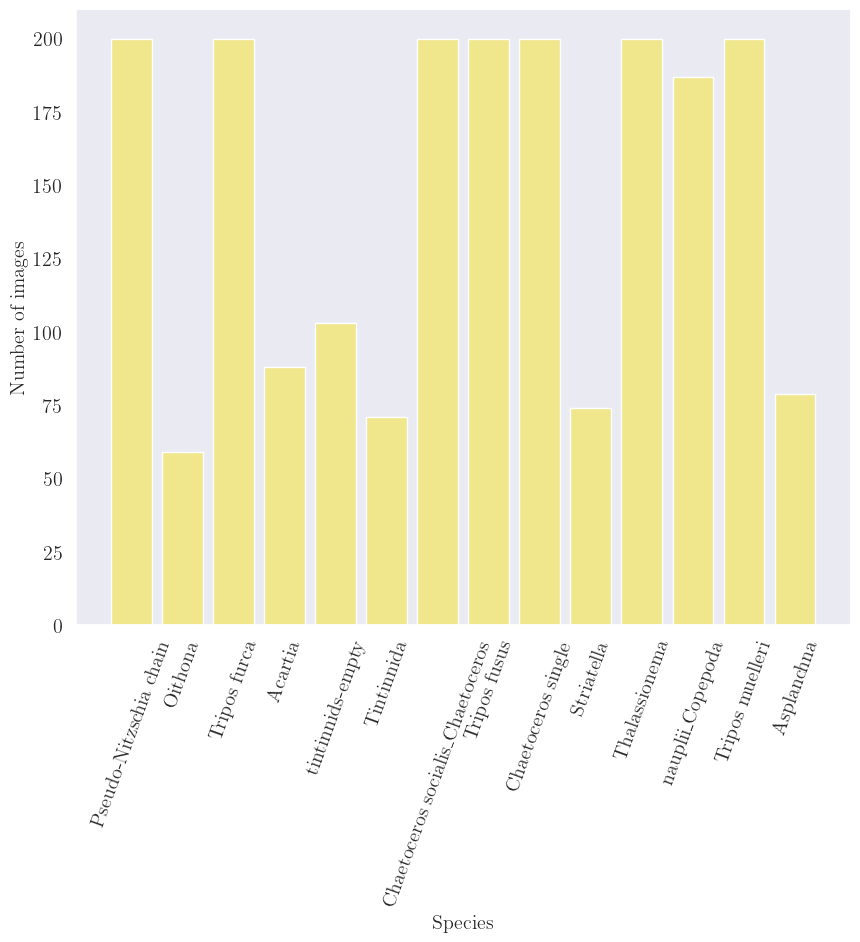

In [ ]:
#data = pd.read_csv("../data/features_padded_plancton")

import matplotlib.pyplot as plt
import seaborn as sns

def set_plt_params(remove_grid=False):
    """Set parameters and use seaborn theme to plot."""
    sns.set_theme()
    if remove_grid:
        sns.set_style("whitegrid", {"axes.grid": False})
    params = {
        "font.family": "Serif",
        "font.serif": "Roman", 
        "text.usetex": True,
        "axes.titlesize": "large",
        "axes.labelsize": "large",
        "xtick.labelsize": "large",
        "ytick.labelsize": "large",
        "legend.fontsize": "medium", 
        "savefig.dpi": 300, 
        "axes.grid" : False
    }
    plt.rcParams.update(params)
set_plt_params()


main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

amount = []
for specie in species: 
    no = len([image for image in os.listdir(main_dir+specie) if not image.startswith(".")])
    amount.append(no)
    
#amount
plt.figure(figsize=(10, 8))
plt.bar(species, amount, color = "khaki")
plt.xticks(rotation=70)
plt.ylabel("Number of images")
plt.xlabel("Species")
#plt.savefig("figs/label_distribution.pdf", bbox_inches = "tight")


In [44]:
indexs = species
df = pd.DataFrame(columns = ["feature_" + str(i) for i in range(384)], index=indexs)



In [45]:
main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

d_dict = {}

for specie in species: 
    imfls = [image for image in os.listdir(main_dir+specie) if not image.startswith(".")]
    for im in imfls:
        d_dict[(specie, im)] = np.loadtxt(main_dir+specie + "/" + im)

features = pd.DataFrame(d_dict).T
#features.to_csv('../../data/dinov2_features.csv')

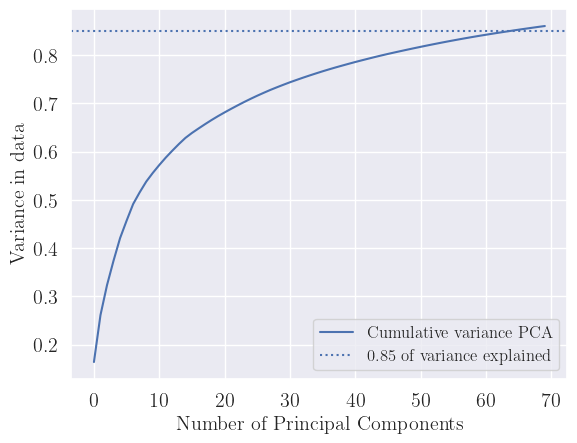

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 70)

pca.fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cumulative variance PCA")
plt.axhline(0.85, ls = ":", label = "0.85 of variance explained")
plt.grid(True)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance in data")
plt.legend()
#plt.savefig("figs/cumsum_pca.pdf", bbox_inches = "tight")
plt.show()

In [57]:
import umap
n = 70
standard = StandardScaler().fit_transform(features) 
pca_fit = pca.fit_transform(standard)

#umap
reducer = umap.UMAP(random_state=42) # fixed random state gives reproducibility
embedding = reducer.fit_transform(standard) 

# putting all pca into pca df and umap df
pca_df = pd.DataFrame(pca_fit, index = features.index, columns = ["pca_"+str(i) for i in range(n)])
umap_df = pd.DataFrame(embedding, index = features.index, columns = ["embedding_0", "embedding_1"])

pca_df

/Users/ellen-beatetysvaer/opt/anaconda3/envs/pthree-dev/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


pca_0     pca_1     pca_2  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   12.223679 -3.609306  1.047031   
                       18_48_01_603240_0.txt   14.450505 -2.740759 -4.360431   
                       16_14_20_282179_0.txt   12.429805  0.061900 -0.020333   
                       12_47_38_412989_10.txt   9.590462 -1.539974  2.119135   
                       11_34_18_433102_1.txt    1.282143 -0.476244  0.385858   
...                                                  ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   -7.051107  1.405521  3.973012   
                       14_12_09_513048_2.txt   -4.750661  3.092971  3.855723   
                       23_02_55_885299_1.txt   -8.363859  1.980346  3.887527   
                       17_04_17_138640_1.txt   -3.361623 -1.803100  3.293155   
                       13_50_34_650304_0.txt   -5.092860  0.666015  3.600835   

                                                  pca_3     pca_4     pca_5  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.063285 -0.184627 -2.820784   
                       18_48_01_603240_0.txt  -0.653177 -3.584079 -7.312570   
                       16_14_20_282179_0.txt   1.302184 -0.247371 -0.402312   
                       12_47_38_412989_10.txt  1.053271  2.053153 -3.208092   
                       11_34_18_433102_1.txt  -4.978654  7.877699 -6.574208   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   3.903084 -2.438516 -1.038009   
                       14_12_09_513048_2.txt   9.497847 -2.451063 -5.024812   
                       23_02_55_885299_1.txt   3.251260 -0.539065  1.923407   
                       17_04_17_138640_1.txt   2.296947 -1.273597  3.033136   
                       13_50_34_650304_0.txt   7.858266 -2.241585 -2.764541   

                                                  pca_6     pca_7     pca_8  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.188226  2.947872 -1.793465   
                       18_48_01_603240_0.txt  -5.057804 -0.163797  1.077410   
                       16_14_20_282179_0.txt   1.418468  0.399460 -4.266520   
                       12_47_38_412989_10.txt -1.269137  4.316184 -2.071705   
                       11_34_18_433102_1.txt   1.433539  1.821135 -0.933681   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   2.227237  0.799068  2.407127   
                       14_12_09_513048_2.txt  -1.872133  0.211089  6.187174   
                       23_02_55_885299_1.txt  -0.980104 -1.598422  2.118128   
                       17_04_17_138640_1.txt  -2.575174  1.307419  2.440501   
                       13_50_34_650304_0.txt   1.599352 -0.924852  7.632638   

                                                  pca_9  ...    pca_60  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt  -2.041242  ...  0.242550   
                       18_48_01_603240_0.txt  -0.697350  ...  1.556575   
                       16_14_20_282179_0.txt  -1.802502  ... -0.694124   
                       12_47_38_412989_10.txt -2.606604  ...  0.779573   
                       11_34_18_433102_1.txt  -0.116824  ...  0.360905   
...                                                 ...  ...       ...   
Asplanchna             17_13_45_429581_1.txt  -2.173904  ... -0.757453   
                       14_12_09_513048_2.txt   0.033088  ...  1.554056   
                       23_02_55_885299_1.txt  -2.171880  ...  0.416379   
                       17_04_17_138640_1.txt  -3.200046  ... -0.602671   
                       13_50_34_650304_0.txt   3.209385  ... -0.133669   

                                                 pca_61    pca_62    pca_63  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt  -0.539189 -1.707106 -2.100205   
                       18_48_01_603240_0.txt  -1.227476  0.595465 -0.365678   
                       16_14_20_282179_0.txt   0.839730 -0.705736 

In [58]:

pca_df = pca_df.reset_index()
map = {"level_0":"species", "level_1": "filename"}
pca_df = pca_df.rename(columns = {"level_0" : "species", "level_1" : "filename"})


pca_df

,species,filename,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,...,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69
0,Pseudo-Nitzschia chain,11_31_24_300112_1.txt,12.223679,-3.609306,1.047031,1.063285,-0.184627,-2.820784,1.188226,2.947872,...,0.242550,-0.539189,-1.707106,-2.100205,-1.774563,-0.690117,-0.073273,-0.994565,0.518281,-0.833046
1,Pseudo-Nitzschia chain,18_48_01_603240_0.txt,14.450505,-2.740759,-4.360431,-0.653177,-3.584079,-7.312570,-5.057804,-0.163797,...,1.556575,-1.227476,0.595465,-0.365678,-0.393044,-1.053127,0.501291,-0.304548,-1.166207,-0.318199
2,Pseudo-Nitzschia chain,16_14_20_282179_0.txt,12.429805,0.061900,-0.020333,1.302184,-0.247371,-0.402312,1.418468,0.399460,...,-0.694124,0.839730,-0.705736,-0.828321,-1.267888,-2.840223,-0.422855,0.041208,0.945097,-1.681917
3,Pseudo-Nitzschia chain,12_47_38_412989_10.txt,9.590462,-1.539974,2.119135,1.053271,2.053153,-3.208092,-1.269137,4.316184,...,0.779573,-0.610639,-0.399149,-1.763825,-0.405407,0.701549,-0.778470,-1.063152,0.172544,0.242429
4,Pseudo-Nitzschia chain,11_34_18_433102_1.txt,1.282143,-0.476244,0.385858,-4.978654,7.877699,-6.574208,1.433539,1.821135,...,0.360905,0.389670,-0.488982,-0.037582,-0.712009,0.909705,-0.056926,0.244149,0.304400,0.070549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,Asplanchna,17_13_45_429581_1.txt,-7.051107,1.405521,3.973012,3.903084,-2.438516,-1.038009,2.227237,0.799068,...,-0.757453,-0.308874,0.478421,-0.633392,0.181589,-0.759319,-0.382198,1.527320,0.476339,1.638416
2057,Asplanchna,14_12_09_513048_2.txt,-4.750661,3.092971,3.855723,9.497847,-2.451063,-5.024812,-1.872133,0.211089,...,1.554056,0.411031,-0.691310,-0.412201,0.453263,-0.035456,-1.699453,0.143584,1.178903,-0.285052
2058,Asplanchna,23_02_55_885299_1.txt,-8.363859,1.980346,3.887527,3.251260,-0.539065,1.923407,-0.980104,-1.598422,...,0.416379,-0.536245,0.602194,2.347430,-0.293351,-0.781121,0.595521,-0.680207,0.399262,-0.459153
2059,Asplanchna,17_04_17_138640_1.txt,-3.361623,-1.803100,3.293155,2.296947,-1.273597,3.033136,-2.575174,1.307419,...,-0.602671,-0.551014,-0.513034,0.575606,-0.620922,-0.362337,-0.342190,-1.082571,1.279029,0.438833


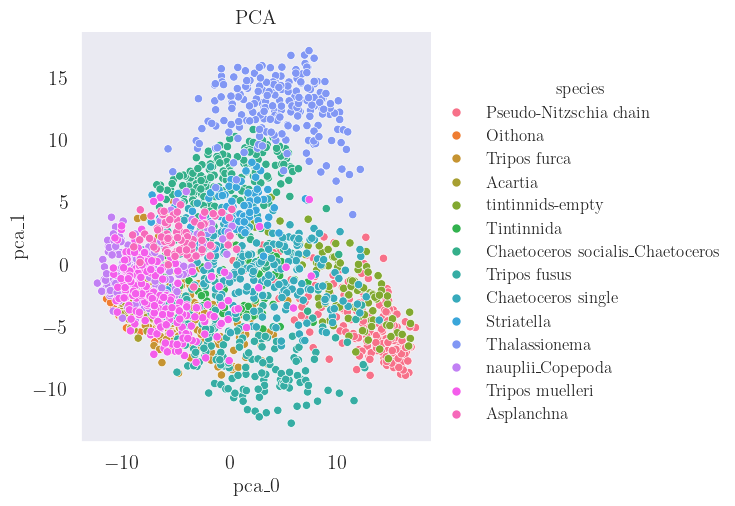

In [ ]:
sns.relplot(x = "pca_0", y = "pca_1", 
            data = pca_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"PCA")
#plt.savefig("figs/pca0_pca1.pdf", bbox_inches = "tight")
plt.show()


In [65]:
umap_df = umap_df.reset_index()
umap_df.columns = ['species', 'file_name', 'embedding_0', 'embedding_1']

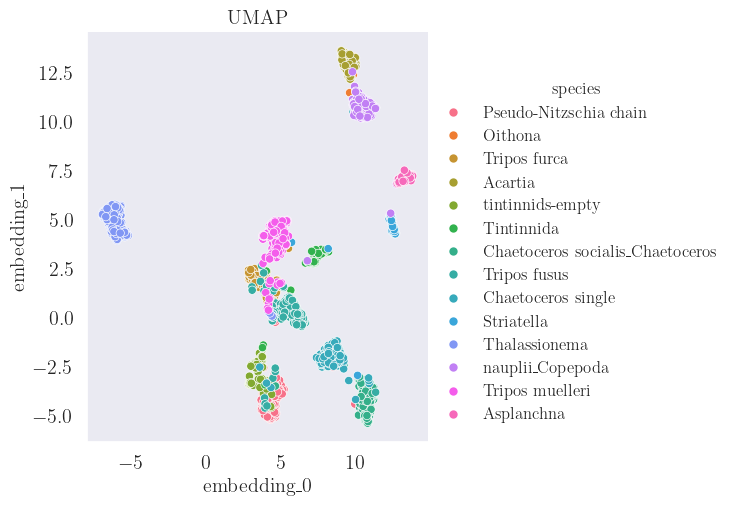

In [ ]:
sns.relplot(x = "embedding_0", y = "embedding_1", 
            data = umap_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"UMAP")
#plt.savefig("figs/umap.pdf", bbox_inches = "tight")
plt.show()